In [30]:
# Artificial Neural Network

# Part 1 - Data Preprocessing
# Importing the libraries
import numpy as np
import pandas as pd
import seaborn as sns
from keras import backend as K
from keras.layers import Dense
from keras.models import Sequential
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score, f1_score

In [31]:
def recall_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

def precision_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [32]:
# Importing the dataset
df = pd.read_csv('BankCustomers.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [33]:
X = df.iloc[:, 3:13]
y = df.iloc[:, 13]
# convert categorical feature into dummy variables

states=pd.get_dummies(X['Geography'],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)

#concatenate the remaining dummies columns
X=pd.concat([X,states,gender],axis=1)

#drop the columns as it is no longer required

X=X.drop(['Geography','Gender'],axis=1)

In [34]:
# from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X)
scaled_data=scaler.transform(X)
X=scaled_data

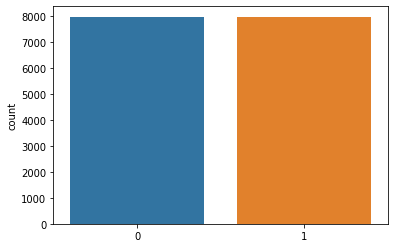

In [35]:
from imblearn.over_sampling import SMOTE
from collections import Counter
X_resampled, y_resampled = SMOTE().fit_resample(X, y)
sns.countplot(y_resampled, data=df)

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size = 0.25, random_state = 0)

In [37]:
# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(activation="relu", input_dim=11, units=6))

# Adding the second hidden layer
classifier.add(Dense(activation="relu", units=6))

# Adding the output layer
classifier.add(Dense(activation="sigmoid", units=1))

In [38]:
# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = [f1_m, 'accuracy'])

# Fitting the ANN to the Training set
classifier.fit(X_train, y_train, batch_size = 10, nb_epoch = 50)

# Part 3 - Making the predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)


C:\Users\sabuh\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """


Epoch 1/50
11944/11944 [==============================] - 3s 283us/step - loss: 0.6281 - f1_m: 0.6121 - accuracy: 0.6485
Epoch 2/50
11944/11944 [==============================] - 2s 199us/step - loss: 0.5503 - f1_m: 0.7125 - accuracy: 0.7293
Epoch 3/50
11944/11944 [==============================] - 3s 220us/step - loss: 0.5270 - f1_m: 0.7287 - accuracy: 0.7450
Epoch 4/50
11944/11944 [==============================] - 2s 204us/step - loss: 0.4896 - f1_m: 0.7508 - accuracy: 0.7674
Epoch 5/50
11944/11944 [==============================] - 2s 199us/step - loss: 0.4667 - f1_m: 0.7540 - accuracy: 0.7733
Epoch 6/50
11944/11944 [==============================] - 2s 203us/step - loss: 0.4574 - f1_m: 0.7588 - accuracy: 0.7774
Epoch 7/50
11944/11944 [==============================] - 2s 187us/step - loss: 0.4510 - f1_m: 0.7583 - accuracy: 0.7818
Epoch 8/50
11944/11944 [==============================] - 2s 190us/step - loss: 0.4484 - f1_m: 0.7627 - accuracy: 0.7831
Epoch 9/50
11944/11944 [========

In [42]:
from ann_visualizer.visualize import ann_viz
from graphviz import Digraph

ann_viz(classifier, title="My first neural network")
ann_viz(
  classifier, 
  view=True, 
  model=""

)

TypeError: ann_viz() got multiple values for argument 'model'

In [39]:
# Making the Confusion Matrix
#y_test=y_test.values.reshape(y_test.shape[0], 1)

cm = confusion_matrix(y_test, y_pred)
accuracy=accuracy_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)

print(accuracy)
#print(cm)
print(f1)

0.7837769964841788
0.7820804859529233


In [41]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(classifier,X_resampled,y_resampled,cv=5)
print("Corss_Vall result:",score.mean())

TypeError: Cannot clone object '<keras.engine.sequential.Sequential object at 0x0000021C32B65248>' (type <class 'keras.engine.sequential.Sequential'>): it does not seem to be a scikit-learn estimator as it does not implement a 'get_params' methods.